# Yahoo Finance High Price Analysis

We are analyzing the hourly high price data for 10 companies namely:
* Facebook (FB)
* Shopify (SHOP)
* Beyond Meat (BYND)
* Netflix (NFLX)
* Pinterest (PINS)
* Square (SQ)
* The Trade Desk (TTD)
* Okta (OKTA)
* Snap (SNAP)
* Datadog (DDOG)

We are using the data from our output from Athena Query

## Data Import into Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

data = pd.read_csv('results.csv')
data.head()

,Company,Hour,HighestPrice,HighPriceOccurance
0,BYND,9,137.970001,2020-05-14 09:39:00-04:00
1,BYND,10,139.559998,2020-05-14 10:31:00-04:00
2,BYND,11,141.000000,2020-05-14 11:15:00-04:00
3,BYND,12,138.240005,2020-05-14 12:57:00-04:00
4,BYND,13,137.789902,2020-05-14 13:00:00-04:00


## Plot Hourly High Price Trends for Each Company

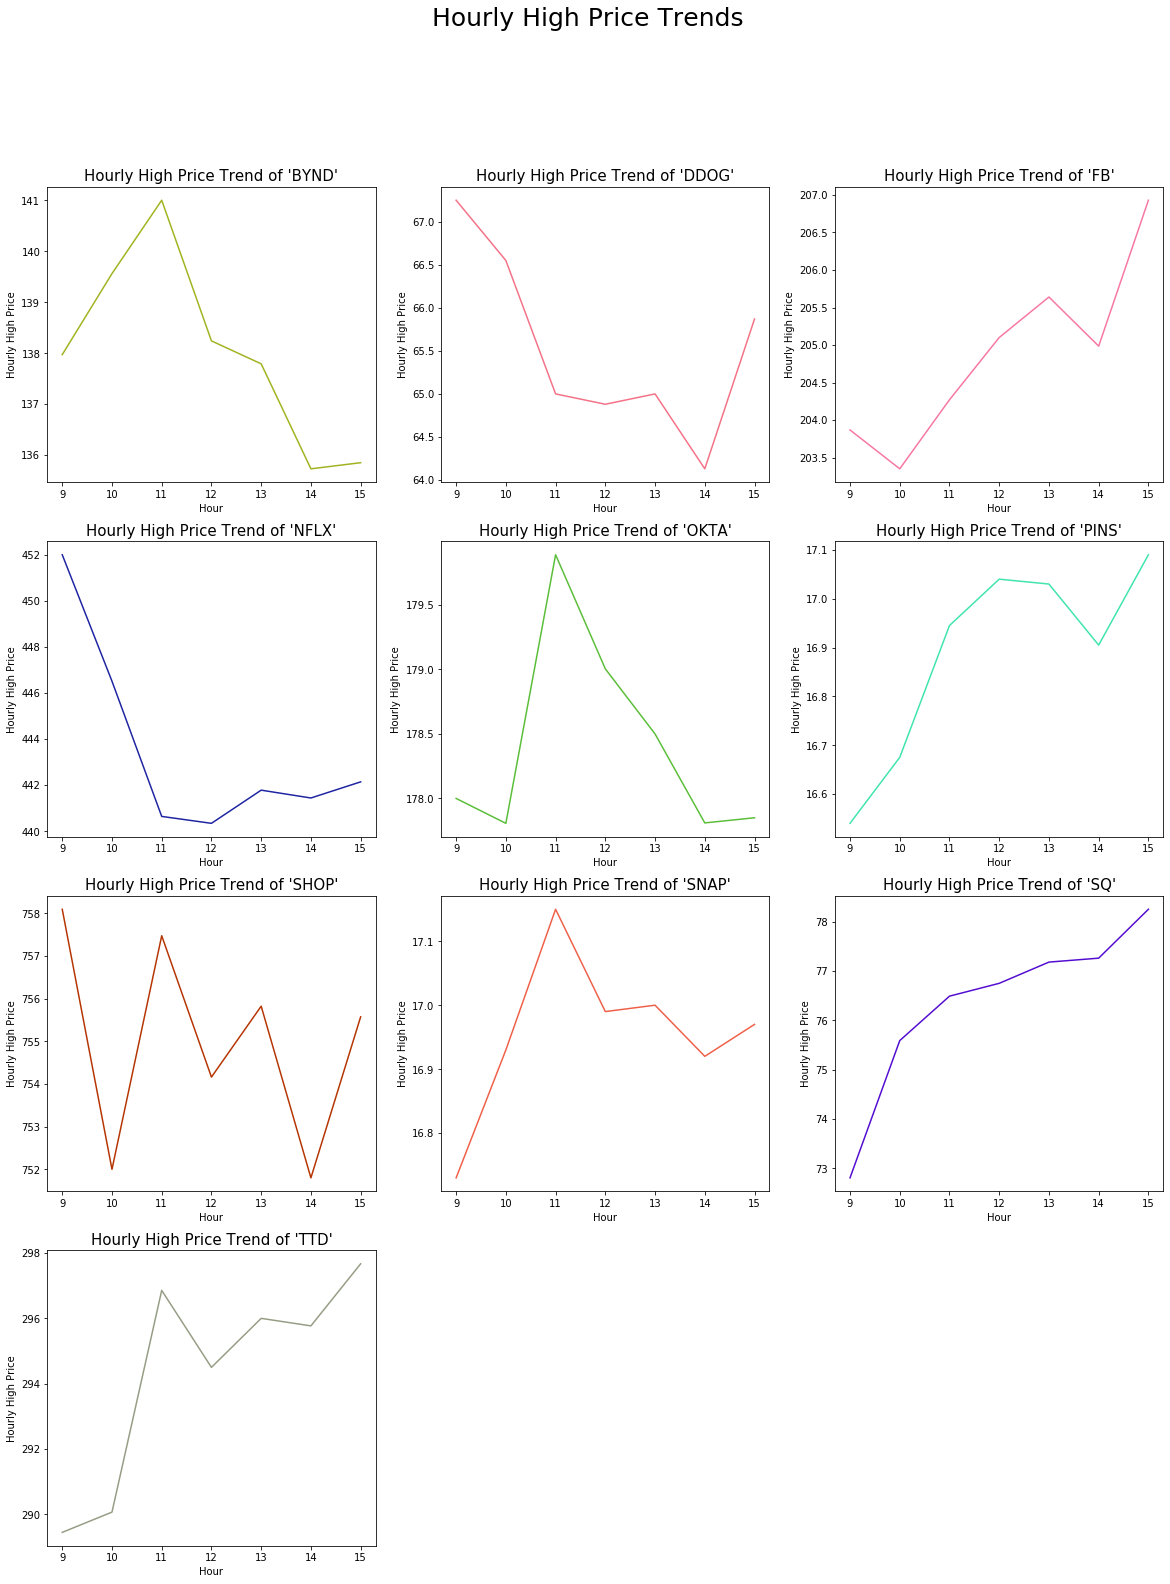

In [2]:
fig = plt.figure(figsize =(20,25))
i = 1
for tkr in data['Company'].unique():
    plot_df = data[data['Company'] == tkr]
    plt.subplot(4,3,i)
    plt.plot(plot_df.Hour, plot_df.HighestPrice,color=numpy.random.rand(3,))
    plt.title(f"Hourly High Price Trend of '{tkr}'",fontsize=15)
    plt.xlabel("Hour")
    plt.ylabel("Hourly High Price")
    i+=1
fig.suptitle('Hourly High Price Trends', fontsize=25)    
plt.show()

## Calculate Daily Change in the High Price

In [3]:
df1 = pd.DataFrame(columns=['Company', 'DailyHighChange'])
i = 0
for tkr in data['Company'].unique():
    df2 = data[data['Company'] == tkr]
    dailychange = list(df2[df2['Hour'] == 15][['HighestPrice']].max() - df2[df2['Hour'] == 9][['HighestPrice']].max())
    df1.loc[i] = [tkr] + dailychange
    i+=1
df1.head()

,Company,DailyHighChange
0,BYND,-2.119995
1,DDOG,-1.380096
2,FB,3.062195
3,NFLX,-9.859985
4,OKTA,-0.149994


## Plot the Daily Change by Company

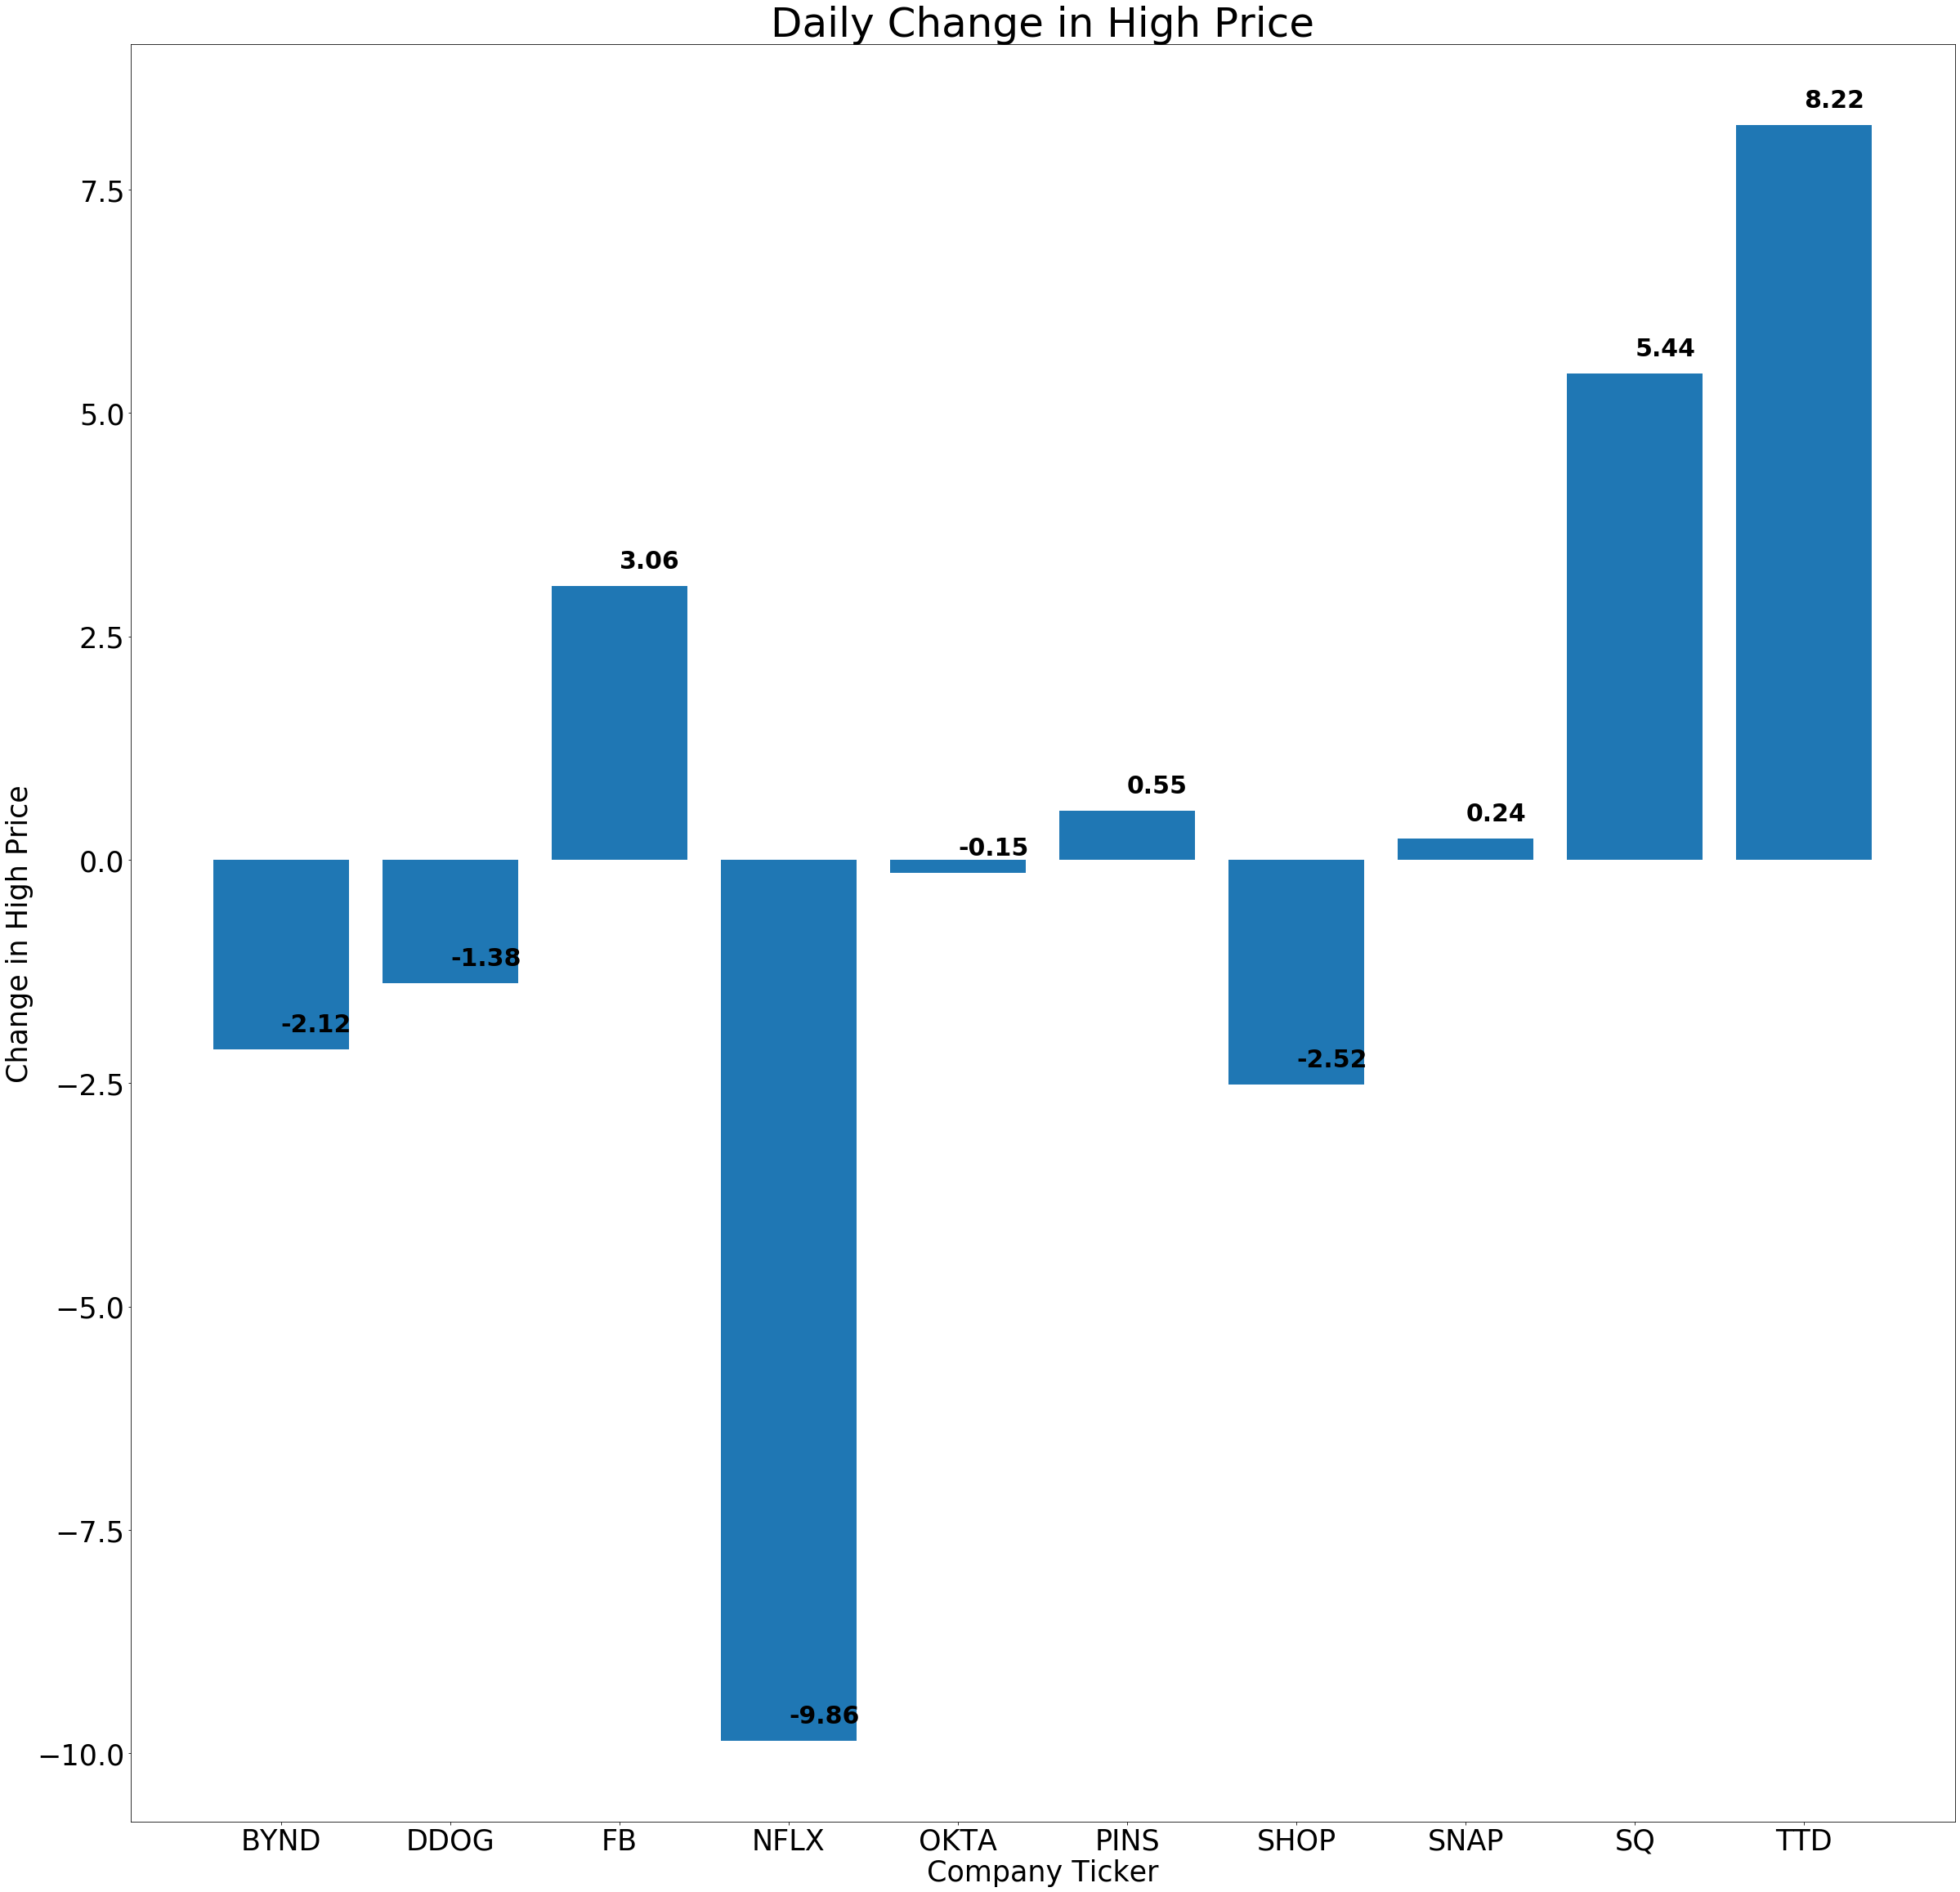

In [4]:
fig = plt.figure(figsize =(40,40))
plt.bar(df1.Company,df1.DailyHighChange)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
for tkr in df1['Company'].unique():
    plt_row = df1[df1['Company'] == tkr]
    highchange = plt_row.DailyHighChange.values
    plt.text( plt_row.Company, highchange[0] + 0.2, str(round(highchange[0],2)), color='black', fontweight='bold',fontsize=30)
plt.title("Daily Change in High Price",fontsize=50)
plt.xlabel("Company Ticker",fontsize = 35)
plt.ylabel("Change in High Price",fontsize = 35)
plt.show()

## Analysis Conclusion

Based on the above graphs we can conclude the following:
* Square's high stock price has consistently increased during the day.
* The Trade Desk observed the highest increase in High Price
* Netflix observed the highest decrease in High Price
